 Mean Absolute Error (MAE): 72.55
 Score: 0.93


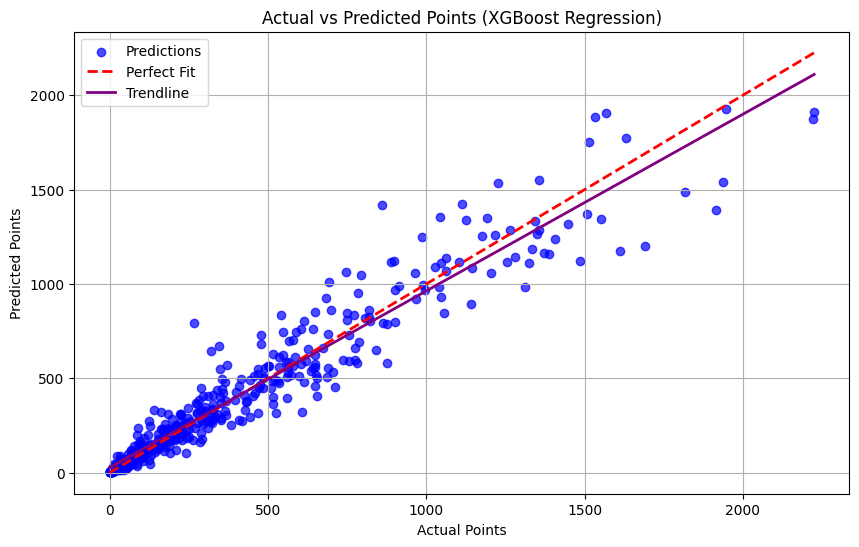

In [9]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

file_path = 'all_nba_playerstats_2021-2025.csv'
data = pd.read_csv(file_path)

features = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']
target = 'PTS'

data = data.dropna(subset=features + [target])

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f" Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f" Score: {r2_xgb:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label="Predictions", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")


z = np.polyfit(y_test, y_pred_xgb, 1) 
p = np.poly1d(z)

y_trendline = p(y_test)

plt.plot(y_test, y_trendline, color='purple', label='Trendline', linewidth=2)

plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points (XGBoost Regression)')
plt.legend()
plt.grid(True)
plt.show()


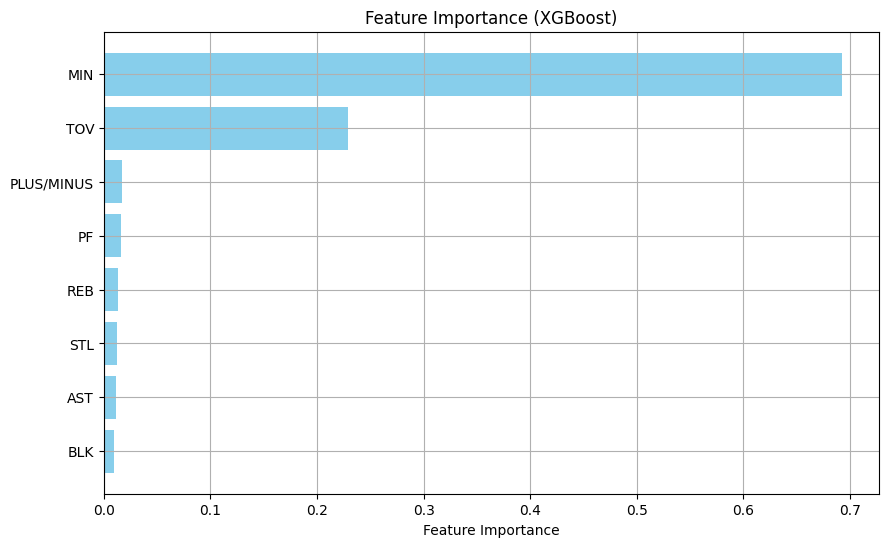

In [10]:
feature_columns = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']

feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'y_pred' is not defined

In [83]:
import statsmodels.api as sm

X = player_stats_df[feature_columns]
y = player_stats_df[target_column]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()


print(results.summary())

p_values = results.pvalues[1:]  
for feature, p_value in zip(feature_columns, p_values):
    print(f"Feature: {feature}, P-value: {p_value}")


                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     3928.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:08:36   Log-Likelihood:                -13709.
No. Observations:                2218   AIC:                         2.744e+04
Df Residuals:                    2209   BIC:                         2.749e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.4815      3.869     -5.035      0.0

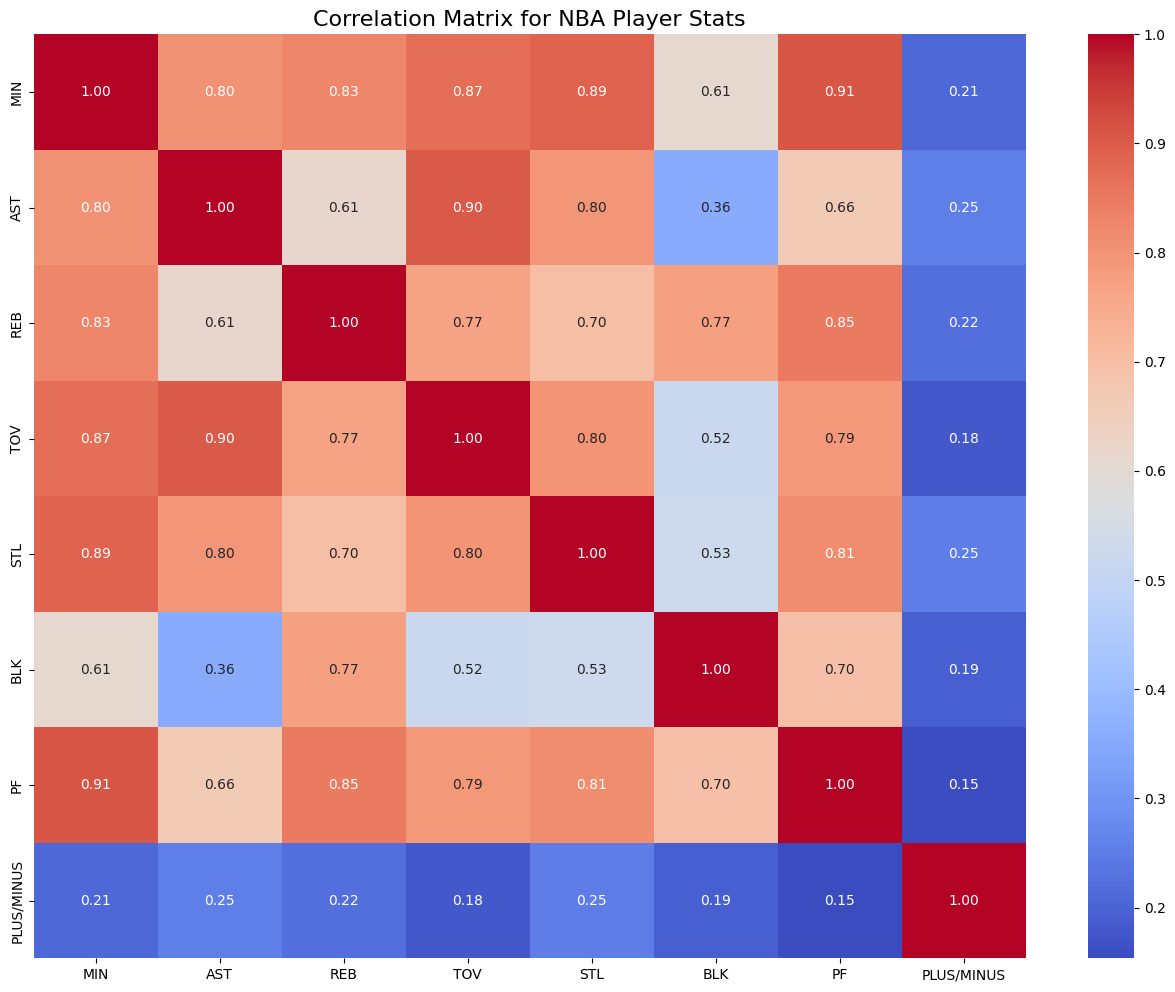

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


file_path = 'all_nba_playerstats_2021-2025.csv'  
player_stats_df = pd.read_csv(file_path)

features = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']
player_stats_df = player_stats_df.dropna(subset=features)
correlation_matrix = player_stats_df[features].corr()


plt.figure(figsize=(16, 12))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for NBA Player Stats", fontsize=16)  
plt.show()
